# Why do people like their steak cooked differently?

I stumbled across this dataset while looking through some of the datasets on FiveThirtyEight's github page. The data comes from a survey of 550 people that evaluates what types of risky behavior they engage in as well as how they prefer their steak cooked. There is an article on the results of the survey along with a link to the data here:
https://fivethirtyeight.com/datalab/how-americans-like-their-steak/

In [1]:
# Import Useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Put the data into a pandas DataFrame
sns.set_style('whitegrid')
steak_df = pd.read_csv('../data/fivethirtyeight-data/steak-survey/steak-risk-survey.csv')
steak_df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [3]:
# The column names will be replaced with shorter ones
steak_df.columns = ['ID', 'Lottery A/B', 'Smoke','Drink','Gamble','Skydived','DriveOverSpeedLimit','CheatedSO',
                   'EatSteak','SteakPrefer','Gender','Age','Income','Education','Location']

# The first row does not represent a participant in the survey so we will drop it
steak_df.drop(0,inplace=True)

First, I wanted to see how the particpants wanted their steak cooked in terms of total particpants.

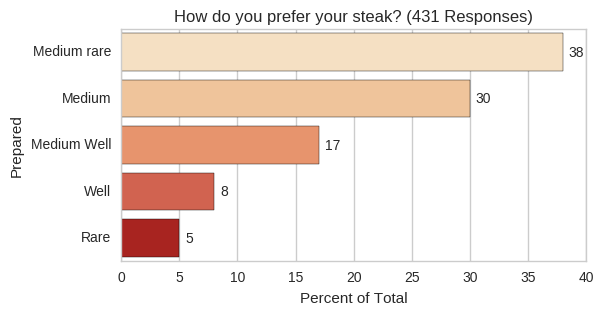

In [4]:
# Made a new dataframe that will be used to create a bar chart
prefer_pct = (steak_df['SteakPrefer'].value_counts() / steak_df['SteakPrefer'].dropna().count() * 100).astype(int)
prefer_pct = prefer_pct.to_frame('Prepared').reset_index()
prefer_pct.columns = ['Prepared', 'Percent Preferred']

#Let's plot our data frame
fig = plt.figure(figsize=(6,3))
ax = sns.barplot(y='Prepared',x='Percent Preferred', data=prefer_pct,palette='OrRd')
ax.set(xlabel = 'Percent of Total',)
ax.set_title('How do you prefer your steak? (431 Responses)')

# This adds the number assigned to each bar in the plot
for i, v in enumerate(prefer_pct['Percent Preferred'].values):
    ax.text(v + 0.5, i +.10, str(v))

As we can see, most people prefer their steak to be between medium and medium rare. Steak that is cooked rare seems to be the least preferred option.

Now let's look at the different types of risky behavior.

In [5]:
# We want to convert all the variables with Yes/No answers into 1/0 so we can do some manipulation with it

def convert_to_num(val):
    if val == 'Yes':
        return 1
    else:
        return 0
    
for i in steak_df.drop(['ID','Lottery A/B','Age','SteakPrefer','Income','Education','Location'],axis=1).columns:
    steak_df[i] = steak_df[i].apply(convert_to_num)


print("% Engage in Risky Behavior by Steak Preference")
(steak_df.groupby('SteakPrefer').mean().drop(['ID','EatSteak','Gender'],axis=1) * 100).astype(int)


% Engage in Risky Behavior by Steak Preference


,Smoke,Drink,Gamble,Skydived,DriveOverSpeedLimit,CheatedSO
SteakPrefer,,,,,,
Medium,15,82,55,6,93,19
Medium Well,14,77,42,9,90,18
Medium rare,18,77,48,6,89,12
Rare,26,86,52,4,95,21
Well,13,66,50,5,80,19


This table can be read as such: 'Of those who prefer their steak cooked Medium, 15% smoke, 82% drink, etc.'
It seems as though those who prefer their steak cooked Rare are more likely to be enganged in risky behavior.
However, when we run the line below we find that only 23 people preferred rare. Their group is more likely to be 
biased by such a small sample. Interestingly enough, we find that a smaller percent of those who eat steak Medium Rare have cheated on a significant other before.

In [6]:
steak_df.groupby('SteakPrefer')['ID'].count()

SteakPrefer
Medium         132
Medium Well     75
Medium rare    166
Rare            23
Well            36
Name: ID, dtype: int64

Now I want to look at demographic information with the use of crosstabs to see if anything sticks out.

In [7]:
# AGE
(pd.crosstab(steak_df['SteakPrefer'],steak_df['Age'],margins=True,normalize=True) * 100).astype(int)

Age,18-29,30-44,45-60,> 60,All
SteakPrefer,,,,,
Medium,7,8,7,7,30
Medium Well,3,4,4,4,16
Medium rare,7,9,10,11,38
Rare,0,0,1,1,5
Well,1,2,3,1,8
All,20,25,26,26,100


In [8]:
# GENDER
(pd.crosstab(steak_df['SteakPrefer'],steak_df['Gender'],margins=True,normalize=True) * 100).astype(int)

Gender,0,All
SteakPrefer,,
Medium,30,30
Medium Well,17,17
Medium rare,38,38
Rare,5,5
Well,8,8
All,100,100


In [9]:
# INCOME
(pd.crosstab(steak_df['SteakPrefer'],steak_df['Income'],margins=True,normalize=True) * 100).astype(int)

Income,"$0 - $24,999","$100,000 - $149,999","$150,000+","$25,000 - $49,999","$50,000 - $99,999",All
SteakPrefer,,,,,,
Medium,3,5,5,4,13,32
Medium Well,2,2,2,3,6,17
Medium rare,3,8,2,7,15,37
Rare,0,1,0,0,2,5
Well,0,1,0,0,3,6
All,11,19,11,17,40,100


In [10]:
# LOCATION
(pd.crosstab(steak_df['SteakPrefer'],steak_df['Location'],margins=True,normalize=True) * 100).astype(int)

Location,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,All
SteakPrefer,,,,,,,,,,
Medium,5,0,4,2,2,5,4,2,1,30
Medium Well,2,0,3,1,1,1,3,1,0,17
Medium rare,5,2,3,2,3,6,7,3,3,38
Rare,0,0,1,0,0,1,1,0,0,5
Well,1,0,1,1,0,1,1,0,0,8
All,15,4,13,8,8,16,18,8,5,100


There isn't much of a relationship that can be teased out when simply looking at these crosstabs between demographic
factor and steak preference. 

Lastly, let's look at the results from the hypothetical lottery question. The question is this:

"Consider the following hypothetical situations: In Lottery A, you have a 50% chance of success, with a payout of 100. In Lottery B, you have a 90% chance of success, with a payout of 20. Assuming you have $10 to bet, would you play Lottery A or Lottery B?"

Picking Lottery A is considered to be the more risky behavior.

In [11]:
(pd.crosstab(steak_df['SteakPrefer'],steak_df['Lottery A/B'],margins=True,normalize=True) * 100).astype(int)

Lottery A/B,Lottery A,Lottery B,All
SteakPrefer,,,
Medium,17,13,30
Medium Well,7,9,17
Medium rare,17,21,38
Rare,2,3,5
Well,3,4,8
All,48,51,100


Nada, again nothing seems to stick out as meaningful here. For now, it seems we don't know why people prefer their steaks cooked differently.